Importing basic libraries

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

Loading ML dedicated libraries

In [3]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Conv1D, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

Using TensorFlow backend.


Loading the input file and defining the subsamples

In [3]:
f = np.load("../data/featuresData.npz")
inputData = f["arr_0"]


In [4]:
print(inputData.shape)
print(inputData[0,0:10])


(51, 10678)
[4.469977  3.4607365 3.6193264 4.0762377 4.79697   3.7272146 4.906417
 3.9718556 3.6949456 4.485333 ]


In [5]:
inputData = inputData[:,np.logical_or(inputData[13,:],inputData[14,:])]
triggerFlags = (inputData[10:-6,:]).astype(int) == 1
channelFlags = (inputData[-2,]).astype(int) == 1
nn_inputFeatures_tmp = inputData[0:-6,:]
#from scipy.scarse import coo_matrix
#nn_inputFeatures_scarse = coo_matrix(nn_inputFeatures)
from sklearn.utils import shuffle
nn_inputFeatures = shuffle(nn_inputFeatures_tmp, random_state=0)

In [6]:
print(triggerFlags)
print(np.sum(triggerFlags[3,triggerFlags[0,:]]))

[[False False False ... False False False]
 [False  True  True ... False False False]
 [False  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
0


Importing NN libraries

Definition of the model

In [7]:
batch_size = 500
n_epochs = 100
dropoutRate = 0.2

inputLayer = Input(shape=(45,))
x = BatchNormalization()(inputLayer)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(30, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
x = Dense(10, activation = 'relu')(x)
x = Dropout(rate=dropoutRate)(x)
outputLayer = Dense(1, activation = 'sigmoid')(x)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model = Model(inputs = inputLayer, outputs = outputLayer)
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 45)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 45)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1380      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930 

In [9]:
history = model.fit(np.transpose(nn_inputFeatures), np.transpose(channelFlags), epochs = n_epochs, batch_size = batch_size, verbose = 1,
        validation_split = 0.3, 
        callbacks = [ 
        EarlyStopping(monitor='val_loss', patience=10, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience=2, verbose = 1), 
        TerminateOnNaN()])


Instructions for updating:
Use tf.cast instead.
Train on 7474 samples, validate on 3204 samples
Epoch 1/100
7474/7474 [==============================] - 2s 323us/step - loss: 0.5687 - acc: 0.7296 - val_loss: 0.3161 - val_acc: 1.0000
Epoch 2/100
7474/7474 [==============================] - 0s 21us/step - loss: 0.4914 - acc: 0.7997 - val_loss: 0.1973 - val_acc: 1.0000
Epoch 3/100
7474/7474 [==============================] - 0s 20us/step - loss: 0.4625 - acc: 0.8440 - val_loss: 0.1975 - val_acc: 1.0000
Epoch 4/100
7474/7474 [==============================] - 0s 20us/step - loss: 0.4401 - acc: 0.8535 - val_loss: 0.1843 - val_acc: 1.0000
Epoch 5/100
7474/7474 [==============================] - 0s 22us/step - loss: 0.4172 - acc: 0.8550 - val_loss: 0.1637 - val_acc: 1.0000
Epoch 6/100
7474/7474 [==============================] - 0s 21us/step - loss: 0.4012 - acc: 0.8556 - val_loss: 0.1584 - val_acc: 1.0000
Epoch 7/100
7474/7474 [==============================] - 0s 22us/step - loss: 0.3944 - 

Plot of the training history

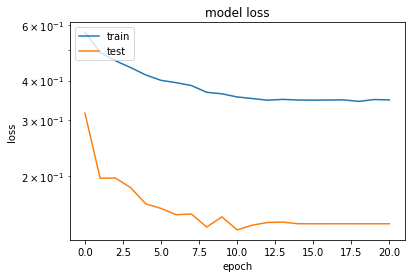

In [10]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()